# Dissipation and adiabatic index in a real TDE sim

In [1]:
%load_ext autoreload
%autoreload 2
import unyt as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import os

import richio
import _nb, dev

In [2]:
path = '/data1/projects/pi-rossiem/TDE_data/R0.47M0.5BH10000beta1S60n1.5ComptonHiResNewAMR/snap_118'
snap = richio.load(path)

In [3]:
gamma = 1 + snap.P / snap.sie / snap.rho

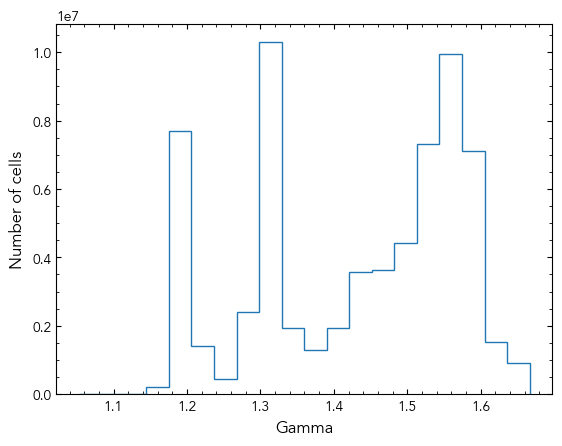

In [4]:
plt.hist(gamma, bins=20, histtype='step')
plt.xlabel(r'Gamma')
plt.ylabel(r'Number of cells')
plt.savefig('../reports/figures/adiabatic-index/gamma.pdf')
plt.show()

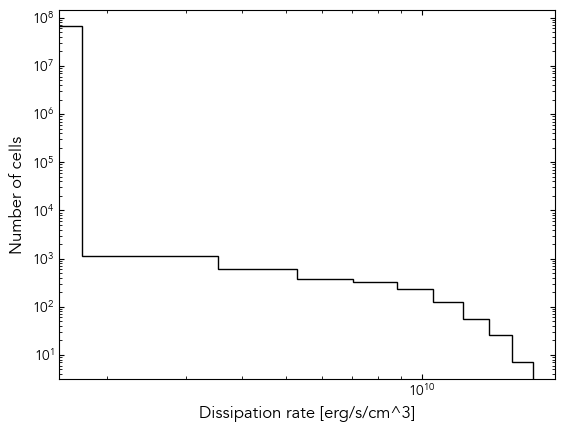

In [5]:
plt.hist(snap.dissipation.in_cgs(), color='k', histtype='step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Dissipation rate [erg/s/cm^3]')
plt.ylabel('Number of cells')

plt.savefig('../reports/figures/adiabatic-index/diss-rate.pdf')
plt.show()

/home/hey4/.conda/envs/richanalysis/lib/python3.13/site-packages/unyt/array.py:1832: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


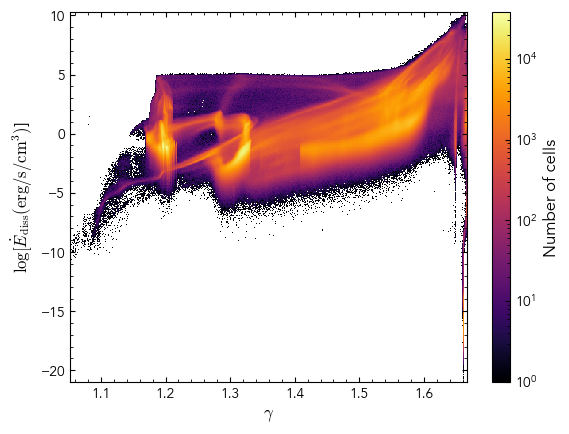

In [6]:
x = gamma
y = np.log10(snap.dissipation.in_cgs())
y_isnan = np.isnan(y)
x = x[~y_isnan]
y = y[~y_isnan]

plt.hist2d(x, y, bins=500, norm=colors.LogNorm(), cmap='inferno')
plt.colorbar(label='Number of cells')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\log[\dot E_\mathrm{diss} \mathrm{(erg/s/cm^3)}$]')
plt.savefig('../reports/figures/adiabatic-index/hist2d-gamma-Ediss.pdf')
plt.show()

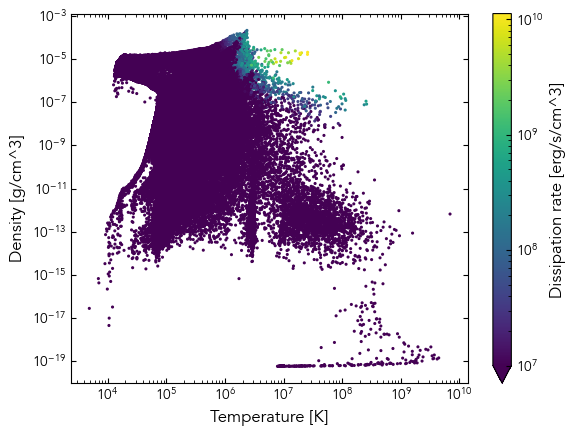

In [7]:
# Select positive dissipation
diss = snap.dissipation[::100].in_cgs()
filter = diss > 0
diss = diss[filter]

plt.scatter(snap.T[::100][filter], snap.rho[::100][filter].in_cgs(),
    c=diss, 
    norm=colors.LogNorm(vmin=1e7),
    marker='.', s=6)
plt.colorbar(label='Dissipation rate [erg/s/cm^3]', extend='min')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Temperature [K]')
plt.ylabel('Density [g/cm^3]')
plt.savefig('../reports/figures/adiabatic-index/diss-on-Trho-plane.pdf')
plt.show()

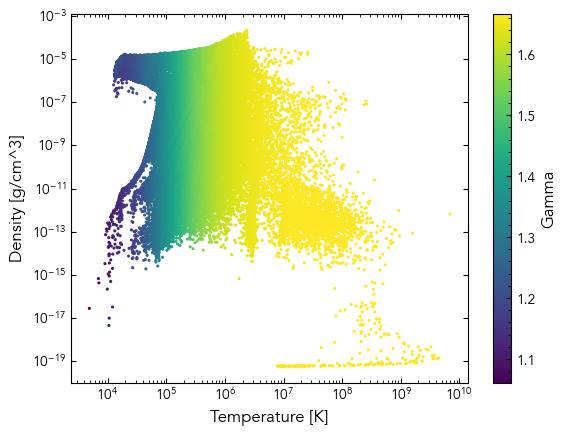

In [8]:
plt.scatter(snap.T[::100], snap.rho[::100].in_cgs(), c=gamma[::100], marker='.', s=6)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Temperature [K]')
plt.ylabel('Density [g/cm^3]')
plt.colorbar(label='Gamma')
plt.savefig('../reports/figures/adiabatic-index/gamma-on-Trho-plane.pdf')
plt.show()